# King - Man + Woman = Queen

There is a common adage about how `king - man + woman = queen` features in most/all semantic vector space models. I loved this when I first heard it. It sounds so fascinating both mathematically and linguistically! But I've never actually explored it. **UNTIL NOW...**

In [1]:
from sentence_transformers import SentenceTransformer
import itertools
import numpy as np
import pandas as pd
import seaborn as sns

/Users/martin/Data/venv/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [3]:
words = ["king", "man", "woman", "queen"]

We'll encode all our individual words so we can do a little vector arithmetic on them in a jiffy...

In [4]:
embeddings = model.encode(words)

In [5]:
embeddings.shape

(4, 384)

In [6]:
vectors = {
    "king": embeddings[0],
    "man": embeddings[1],
    "woman": embeddings[2],
    "queen": embeddings[3]
}

In [7]:
supposedly_queen = vectors["king"] - vectors["man"] + vectors["woman"] # the famous equation

$$ \text{cosine similarity} = \frac{a \cdot b}{\|a\| \|b\|} $$

Cosine similarity helps determine the similarity between two vectors, which can be tricky when they're 384 dimensions. A cosine similarity of `1` means the vectors are identical in direction, `0` indicates no similarity and `-1` shows they are diametrically opposed.

In [8]:
# we can import this from something like scikit, but if you ask me writing it makes it feel less scary...
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [9]:
df = pd.DataFrame([["king", cosine_similarity(vectors["king"], supposedly_queen)], ["queen", cosine_similarity(vectors["queen"], supposedly_queen)]], columns=["vectorised word", "cosine similarity to king - man + woman"]).set_index("vectorised word")

<Axes: xlabel='vectorised word', ylabel='cosine similarity to king - man + woman'>

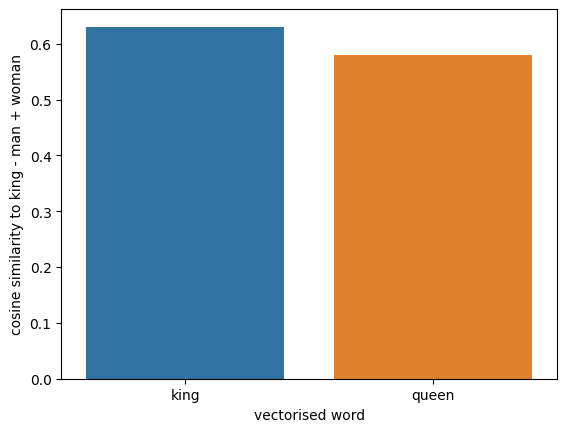

In [10]:
sns.barplot(x=df.index, y=df["cosine similarity to king - man + woman"], hue=df.index)

What a bummer! 

- It's not a _perfect_ similarity, like `king - man + woman = queen` suggests.
- At least with the `all-MiniLM-L6-v2` model, the vector for `king - man + woman` is actually _more_ similar to the vector for `king` than `queen`.
- I probably need to check more about whether you can use embeddings atomically like this. 